In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
import sys
import io

In [3]:
start = 2007
end = 2007

end += 1

seasons_list = [year for year in range(start, end)]
seasons_list

[2007]

In [4]:
def get_team_names(season):
    if season == 2013:
        team_names = {
        'ATL': 'Atlanta Hawks',
        'BOS': 'Boston Celtics',
        'BRK': 'Brooklyn Nets',
        'CHA': 'Charlotte Bobcats',
        'CHI': 'Chicago Bulls',
        'CLE': 'Cleveland Cavaliers',
        'DAL': 'Dallas Mavericks',
        'DEN': 'Denver Nuggets',
        'DET': 'Detroit Pistons',
        'GSW': 'Golden State Warriors',
        'HOU': 'Houston Rockets',
        'IND': 'Indiana Pacers',
        'LAC': 'Los Angeles Clippers',
        'LAL': 'Los Angeles Lakers',
        'MEM': 'Memphis Grizzlies',
        'MIA': 'Miami Heat',
        'MIL': 'Milwaukee Bucks',
        'MIN': 'Minnesota Timberwolves',
        'NOH': 'New Orleans Hornets',
        'NYK': 'New York Knicks',
        'OKC': 'Oklahoma City Thunder',
        'ORL': 'Orlando Magic',
        'PHI': 'Philadelphia 76ers',
        'PHO': 'Phoenix Suns',
        'POR': 'Portland Trail Blazers',
        'SAC': 'Sacramento Kings',
        'SAS': 'San Antonio Spurs',
        'TOR': 'Toronto Raptors',
        'UTA': 'Utah Jazz',
        'WAS': 'Washington Wizards'
    }
    elif season == 2014:
        team_names = {
            'ATL': 'Atlanta Hawks',
            'BOS': 'Boston Celtics',
            'BRK': 'Brooklyn Nets',
            'CHA': 'Charlotte Bobcats',
            'CHI': 'Chicago Bulls',
            'CLE': 'Cleveland Cavaliers',
            'DAL': 'Dallas Mavericks',
            'DEN': 'Denver Nuggets',
            'DET': 'Detroit Pistons',
            'GSW': 'Golden State Warriors',
            'HOU': 'Houston Rockets',
            'IND': 'Indiana Pacers',
            'LAC': 'Los Angeles Clippers',
            'LAL': 'Los Angeles Lakers',
            'MEM': 'Memphis Grizzlies',
            'MIA': 'Miami Heat',
            'MIL': 'Milwaukee Bucks',
            'MIN': 'Minnesota Timberwolves',
            'NOP': 'New Orleans Pelicans',
            'NYK': 'New York Knicks',
            'OKC': 'Oklahoma City Thunder',
            'ORL': 'Orlando Magic',
            'PHI': 'Philadelphia 76ers',
            'PHO': 'Phoenix Suns',
            'POR': 'Portland Trail Blazers',
            'SAC': 'Sacramento Kings',
            'SAS': 'San Antonio Spurs',
            'TOR': 'Toronto Raptors',
            'UTA': 'Utah Jazz',
            'WAS': 'Washington Wizards'
        }
    elif season < 2013:
        team_names = {
            'ATL': 'Atlanta Hawks',
            'BOS': 'Boston Celtics',
            'NJN': 'New Jersey Nets',
            'CHA': 'Charlotte Bobcats',
            'CHI': 'Chicago Bulls',
            'CLE': 'Cleveland Cavaliers',
            'DAL': 'Dallas Mavericks',
            'DEN': 'Denver Nuggets',
            'DET': 'Detroit Pistons',
            'GSW': 'Golden State Warriors',
            'HOU': 'Houston Rockets',
            'IND': 'Indiana Pacers',
            'LAC': 'Los Angeles Clippers',
            'LAL': 'Los Angeles Lakers',
            'MEM': 'Memphis Grizzlies',
            'MIA': 'Miami Heat',
            'MIL': 'Milwaukee Bucks',
            'MIN': 'Minnesota Timberwolves',
            'NOH': 'New Orleans Hornets',
            'NYK': 'New York Knicks',
            'OKC': 'Oklahoma City Thunder',
            'ORL': 'Orlando Magic',
            'PHI': 'Philadelphia 76ers',
            'PHO': 'Phoenix Suns',
            'POR': 'Portland Trail Blazers',
            'SAC': 'Sacramento Kings',
            'SAS': 'San Antonio Spurs',
            'TOR': 'Toronto Raptors',
            'UTA': 'Utah Jazz',
            'WAS': 'Washington Wizards'
        }
    else:
        team_names = {
        'ATL': 'Atlanta Hawks',
        'BOS': 'Boston Celtics',
        'BRK': 'Brooklyn Nets',
        'CHO': 'Charlotte Hornets',
        'CHI': 'Chicago Bulls',
        'CLE': 'Cleveland Cavaliers',
        'DAL': 'Dallas Mavericks',
        'DEN': 'Denver Nuggets',
        'DET': 'Detroit Pistons',
        'GSW': 'Golden State Warriors',
        'HOU': 'Houston Rockets',
        'IND': 'Indiana Pacers',
        'LAC': 'Los Angeles Clippers',
        'LAL': 'Los Angeles Lakers',
        'MEM': 'Memphis Grizzlies',
        'MIA': 'Miami Heat',
        'MIL': 'Milwaukee Bucks',
        'MIN': 'Minnesota Timberwolves',
        'NOP': 'New Orleans Pelicans',
        'NYK': 'New York Knicks',
        'OKC': 'Oklahoma City Thunder',
        'ORL': 'Orlando Magic',
        'PHI': 'Philadelphia 76ers',
        'PHO': 'Phoenix Suns',
        'POR': 'Portland Trail Blazers',
        'SAC': 'Sacramento Kings',
        'SAS': 'San Antonio Spurs',
        'TOR': 'Toronto Raptors',
        'UTA': 'Utah Jazz',
        'WAS': 'Washington Wizards'
    }
    return team_names

team_names = get_team_names(start)

In [5]:
team_conferences = {
    'ATL': 'EAST',
    'BOS': 'EAST',
    'BRK': 'EAST',
    'NJN': 'EAST',
    'CHA': 'EAST',
    'CHO': 'EAST',
    'CHI': 'EAST',
    'CLE': 'EAST',
    'DAL': 'WEST',
    'DEN': 'WEST',
    'DET': 'EAST',
    'GSW': 'WEST',
    'HOU': 'WEST',
    'IND': 'EAST',
    'LAC': 'WEST',
    'LAL': 'WEST',
    'MEM': 'WEST',
    'MIA': 'EAST',
    'MIL': 'EAST',
    'MIN': 'WEST',
    'NOP': 'WEST',
    'NOH': 'WEST',
    'NYK': 'EAST',
    'OKC': 'WEST',
    'ORL': 'EAST',
    'PHI': 'EAST',
    'PHO': 'WEST',
    'POR': 'WEST',
    'SAC': 'WEST',
    'SAS': 'WEST',
    'TOR': 'EAST',
    'UTA': 'WEST',
    'WAS': 'EAST'
}

In [489]:
# team_names = {
#     # 'DET': 'Detroit Pistons',
#     # 'BOS': 'Boston Celtics',
#     # 'PHO': 'Phoenix Suns',
#     'MEM': 'Memphis Grizzlies',

# }

### Collect Roster Average Stats Per Season

In [139]:
# Convert height to inches (Ht format 'ft-in' to inches)
def height_to_inches(height):
    if pd.isna(height):
        return None
    feet, inches = map(int, height.split('-'))
    return feet * 12 + inches

In [1343]:
def clean_roster(roster, team,team_names):

    roster['ht'] = roster['Ht'].apply(height_to_inches)
    
    roster['birth_year'] = pd.to_datetime(roster['Birth Date']).dt.year

    roster['age'] = roster['Season']- roster['birth_year'] -1

    roster['exp'] = roster['Exp'].replace('R', 0)

    roster['exp'] = roster['exp'].round().astype(int)

    roster['team'] = team

    roster['team_full_name'] = roster['team'].map(team_names)
    
    roster.drop(columns=['College','No.','Player','Pos','Birth Date','Birth','birth_year'], inplace=True)

    return roster

In [1344]:
# https://www.basketball-reference.com/teams/DAL/2025.html

def scrape_roster(season):
    all_data = pd.DataFrame()
    team_names = get_team_names(season)

    for team in team_names:

        url = f"https://www.basketball-reference.com/teams/{team}/{season}.html"

        response = requests.get(url)

        # print(response)
        # print(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            table = soup.find('table', {'id': 'roster'})

            if table:
                df = pd.read_html(io.StringIO(str(table)))[0]

                df['Season'] = season
                
                df = clean_roster(df,team,team_names)

                all_data = pd.concat([all_data, df], ignore_index=True)

            else:
                print(f"No table found for {season}")

        else:
            print(f"Failed to retrieve data for {season}")

        time.sleep(4)

    return all_data

In [ ]:
# scrape_roster(2014)

In [1353]:
def team_avg_roster(roster):
    avg_roster = roster.groupby(['team', 'team_full_name','Season']).agg(
        avg_age=('age', 'mean'),
        avg_exp=('exp', 'mean'),
        avg_weight=('Wt', 'mean'),
        avg_height=('ht', 'mean')
    ).reset_index()

    avg_roster = avg_roster[['Season','team', 'team_full_name', 'avg_age', 'avg_exp', 'avg_weight', 'avg_height']]
    
    return avg_roster

### Append pre-season odds

In [92]:
# https://www.basketball-reference.com/leagues/NBA_2025_preseason_odds.html

def scrape_preseason_odds(season):
    all_data = pd.DataFrame()

    url = f"https://www.basketball-reference.com/leagues/NBA_{season}_preseason_odds.html"

    response = requests.get(url)

    # print(response)
    # print(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'id': 'NBA_preseason_odds'})

        if table:
            df = pd.read_html(io.StringIO(str(table)))[0]
            df['Season'] = season
            # df['team']= team
            all_data = pd.concat([all_data, df], ignore_index=True)

        else:
        
            print(f"No table found for {season}")

    else:
        print(f"Failed to retrieve data for {season}")

    return all_data

In [85]:
preseason_odds = scrape_preseason_odds(2025)

In [205]:
avg_n_odds = pd.merge(avg_roster, preseason_odds, left_on='team_full_name', right_on='Team', how='left')

avg_n_odds.drop(columns='Team', inplace=True)


In [ ]:
avg_n_odds.sample(5)

### Append salary stats

In [969]:
def clean_salaries(salaries):
    
    salaries = salaries.head(25).copy()

    salaries.rename(columns={"Unnamed: 1":"player_name"}, inplace=True)
    
    salaries.loc[:, 'Salary'] = salaries['Salary'].fillna(0)

    salaries.loc[:, 'Salary'] = salaries['Salary'].replace({r'\$': '', ',': ''}, regex=True).astype(int)

    salaries = salaries.sort_values(by='Salary', ascending=False)

    salaries = salaries.drop(columns=['Rk'])

    return salaries

In [1122]:
# https://www.basketball-reference.com/teams/CHO/2025.html

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def scrape_salaries(
        season,
        driver,
    ):

    all_data = pd.DataFrame()
    team_names = get_team_names(season)
    
    for team in team_names:

        url = f"https://www.basketball-reference.com/teams/{team}/{season}.html"

        driver.get(url)

        time.sleep(5)

        soup = BeautifulSoup(driver.page_source, 'html.parser')

        div = soup.find('div', {'id': 'div_salaries2'})
        
        if div:
            table = div.find('table', {'id': 'salaries2'})
            if table:
                df = pd.read_html(io.StringIO(str(table)))[0]
                df['Season'] = season
                df['team']= team
                df = clean_salaries(df)
                all_data = pd.concat([all_data, df], ignore_index=True)
            else:
                print(f"No table found inside the div for {team} in {season}")
        else:
            print(f"No div with id 'div_salaries2' found for {team} in {season}")
            
    return all_data

In [ ]:
driver = webdriver.Chrome() 

salaries = scrape_salaries(
    2024, 
    driver,
)

driver.quit()

#### Finding the number of top players per team per season

In [497]:
def count_top_players(salaries,threshold=20):
    # based on the teams salaries we are trying to identify the numbers of stars/top players on the team (a good example is the Phoenix Suns in 2025)

    above = salaries[salaries['salary_percentage'] > threshold].shape[0]
    below = salaries[salaries['salary_percentage'] <= threshold].shape[0]
    
    return pd.Series({'top_players': above, 'not_top_players': below})

In [498]:
def find_top_players(salaries):
    total_salary = salaries.groupby(['team', 'Season'])['Salary'].sum().reset_index(name='total_salary')

    salaries = salaries.merge(total_salary, on=['team', 'Season'], how='left')

    salaries['salary_percentage'] = (salaries['Salary'] / salaries['total_salary']) * 100

    top_players = salaries.groupby(['team', 'Season']).apply(count_top_players).reset_index()
    
    return top_players

In [ ]:
salaries[salaries['team']=='LAL'].sort_values('salary_percentage', ascending=False).head(20)

In [430]:
team_salary_stats = salaries.groupby(['team', 'Season']).agg(
    highest_salary=('Salary', 'max'),
    median_salary=('Salary', 'median'),
    total_salary=('Salary', 'sum'),
    
).reset_index()

top_players = find_top_players(salaries)

team_salary_stats = pd.merge(team_salary_stats, top_players, on=['team', 'Season'], how="left")

In [ ]:
team_salary_stats.sample(3)

In [433]:
avg_odds_salary_players = pd.merge(avg_n_odds, team_salary_stats,on=['team', 'Season'], how='left')


In [ ]:
avg_odds_salary_players.sample(10)

In [436]:
avg_odds_salary_players.to_csv('data/2025_team_data.csv')

### Append Franchise History/Championship stats

In [606]:
def clean_champions(df):

    nba_champions = df[[('Unnamed: 0_level_0', 'Year'), ('Finals', 'Champion')]]
    nba_champions.columns = ['Year', 'Champion']

    nba_champions = nba_champions[nba_champions.Year.notna()]

    nba_champions.Year = nba_champions.Year.astype(int)

    return nba_champions

In [607]:
# https://www.basketball-reference.com/playoffs/

def scrape_champions():
    df = pd.DataFrame()

    url = f"https://www.basketball-reference.com/playoffs/"

    response = requests.get(url)

    # print(response)
    # print(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find('table', {'id': 'champions_index'})

        if table:
            df = pd.read_html(io.StringIO(str(table)))[0]
            df = clean_champions(df)
        else:
        
            print(f"No table found ")

    else:
        print(f"Failed to retrieve data ")

    return df

In [1103]:
# Count number of championships for a given team and season

def nb_championships(season):

    team_names = get_team_names(season)
    
    nba_champions = scrape_champions()

    rev_team_names = {v: k for k, v in team_names.items()}

    nba_champions['team'] = nba_champions['Champion'].map(rev_team_names)
    
    team_championships = []
    
    for team in team_names:
        nb_total = len(nba_champions[
            (nba_champions['team'] == team) & 
            (nba_champions['Year'] <= season)
            ]
        )
        
        nb_interval = len(nba_champions[
            (nba_champions['team'] == team) & 
            (nba_champions['Year'] <= season) & 
            (nba_champions['Year'] > season-4)
            ]
        )
        
        team_championships.append({
            'team': team,
            'Season': season,
            'nb_championships': nb_total,
            'nb_champ_past_4y': nb_interval,
            'winner': len(nba_champions[
                (nba_champions['team'] == team) & 
                (nba_champions['Year'] == season)
                ]
            ),

        })
    
    df = pd.DataFrame(team_championships)
    
    return df


In [ ]:
nb_championships(2020).sample(5)

In [716]:
team_championships = nb_championships(team_names,2025)

In [717]:
avg_odds_salary_players_champ = avg_odds_salary_players.merge(team_championships, on=['team', 'Season'], how='left')

In [ ]:
avg_odds_salary_players_champ.tail(5)

### Append ranking


In [1]:
def clean_ranking(df):
    df = df.sort_values(by='W/L%', ascending=False)
    
    df.rename(columns={df.columns[0]: 'team_full_name'}, inplace=True)

    df = df[~df['team_full_name'].str.contains('Division|Conference', na=False)]

    df[df.columns[0]] = df[df.columns[0]].replace({r'\*': ''}, regex=True)
    
    df = df.reset_index(drop=True)

    df['ranking'] = df.index + 1

    df['ranking'] = df['ranking'].astype(int)

    df = df[['Season',df.columns[0], 'conference','ranking']]
    return df


In [7]:
# https://www.basketball-reference.com/leagues/NBA_2024_standings.html

def scrape_ranking(season):
    all_data = pd.DataFrame()

    url = f"https://www.basketball-reference.com/leagues/NBA_{season}_standings.html"

    response = requests.get(url)

    # print(response)
    # print(url)

    for conf in ['W','E']:
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            table = soup.find('table', {'id': f"confs_standings_{conf}"})

            if table:
                df = pd.read_html(io.StringIO(str(table)))[0]
                
                df['Season'] = season
                if conf == 'W':
                    df["conference"] = "WEST" 
                else:
                    df['conference'] = "EAST"
                    
                df = clean_ranking(df)

                all_data = pd.concat([all_data, df], ignore_index=True)

            else:
                print(f"No table found for {season}. Looking in Division Standings...")

                soup = BeautifulSoup(response.content, 'html.parser')
                table = soup.find('table', {'id': f"divs_standings_{conf}"})

                if table:
                    df = pd.read_html(io.StringIO(str(table)))[0]
                    
                    df['Season'] = season
                    if conf == 'W':
                        df["conference"] = "WEST" 
                    else:
                        df['conference'] = "EAST"
                    
                    df = clean_ranking(df)

                    all_data = pd.concat([all_data, df], ignore_index=True)
                else:
                    print(f"No table found for {season} in Division Standings.")

        else:
            print(f"Failed to retrieve data for {season}")

    return all_data

In [ ]:
ranking = scrape_ranking(2007)
ranking

### Append Number of PO Apperence 

In [61]:
def clean_po(df):
    df['Season'] = (df['Season'].str[0:2] + df['Season'].str[5:]).astype(int)

    df.drop(df.columns[8], axis=1, inplace=True)

    df.drop(df.columns[14], axis=1, inplace=True)

    df.loc[:, 'Team'] = df['Team'].replace({r'\*': '', ',': ''}, regex=True)
    
    df.dropna(subset=['Playoffs'], inplace=True)
    
    return df


In [95]:
# https://www.basketball-reference.com/teams/BOS/

def scrape_po(team_names):
    all_data = pd.DataFrame()
    print('Scraping Playoffs apperences data for every team...')
    
    for team in team_names:
        if team == 'BRK':
            team = 'NJN'
        elif team == 'CHO':
            team = 'CHA'
        elif team == 'NOP':
            team = 'NOH'
            
        url = f"https://www.basketball-reference.com/teams/{team}"

        response = requests.get(url)

        # print(response)
        # print(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            table = soup.find('table', {'id': team})

            if table:
                df = pd.read_html(io.StringIO(str(table)))[0]
                
                df = clean_po(df)

                all_data = pd.concat([all_data, df], ignore_index=True)

            else:
                print(f"No table found for {team}")

        else:
            print(f"Failed to retrieve data for {team} ")

        time.sleep(4)

    return all_data

In [141]:
po = scrape_po(team_names)

In [171]:
def map_team_name(row):
    team_name_mapping = get_team_names(2000)  # get team names from older season
    return team_name_mapping.get(row['team_full_name'], row['team_full_name'])  # Map the team name

In [236]:
def nb_po(po):
    
    po.rename(columns={"Team": 'team_full_name'}, inplace=True)

    po['team_full_name'] = po.apply(map_team_name, axis=1)    

    po = po[['team_full_name', 'Season']]

    po_apperences = po.sort_values(by=['team_full_name', 'Season'])  

    po_apperences['nb_po_apperence'] = po_apperences.groupby('team_full_name').cumcount() + 1

    return po_apperences


In [239]:
po_apperences = nb_po(po)

In [ ]:
po_apperences[po_apperences.team_full_name=='Brooklyn Nets']

### Loop for multiple seasons :o

In [1398]:
def scrape_all_rosters():
    all_rosters = pd.DataFrame()

    for season in range(start, end):  
        print(f"Scraping data for the {season-1}-{season} season...")

        roster = scrape_roster(season)

        if roster is not None:
            all_rosters = pd.concat([all_rosters, roster], ignore_index=True)
            
    return all_rosters

In [ ]:
all_rosters = scrape_all_rosters()

In [1400]:
all_avg_roster = team_avg_roster(all_rosters)

In [1401]:
all_avg_roster.to_csv(f"data/temp/{start}_{end-1}_avg_roster.csv")

In [87]:
def scrape_all_preseason_odds():
    all_preseason_odds = pd.DataFrame()

    for season in range(start, end):  
        print(f"Scraping data for the {season-1}-{season} season...")

        preseason_odds = scrape_preseason_odds(season)

        if preseason_odds is not None:
            all_preseason_odds = pd.concat([all_preseason_odds, preseason_odds], ignore_index=True)

    return all_preseason_odds

In [ ]:
all_preseason_odds = scrape_all_preseason_odds()[["Team","Odds"]]

all_avg_n_odds = pd.merge(all_avg_roster, all_preseason_odds, left_on='team_full_name', right_on='Team', how='left')

all_avg_n_odds.drop(columns='Team', inplace=True)

In [1404]:
all_avg_n_odds.to_csv(f"data/temp/{start}_{end-1}_avg_n_odds.csv")

In [1405]:
def scrape_all_salaries():
    all_salaries = pd.DataFrame()

    driver = webdriver.Chrome() 

    for season in range(start, end):  
        print(f"Scraping data for the {season-1}-{season} season...")

        salaries = scrape_salaries(
            season,
            driver,
        )

        if salaries is not None:
            all_salaries = pd.concat([all_salaries, salaries], ignore_index=True)

    driver.quit()
    
    return all_salaries

In [ ]:
all_salaries = scrape_all_salaries()

In [1407]:
all_salaries.to_csv(f"data/temp/{start}_{end-1}_salaries_stats.csv")

In [ ]:
all_top_players = find_top_players(all_salaries)

team_salary_stats = all_salaries.groupby(['team', 'Season']).agg(
    highest_salary=('Salary', 'max'),
    median_salary=('Salary', 'median'),
    total_salary=('Salary', 'sum'),
    
).reset_index()

all_team_salary_stats = pd.merge(team_salary_stats, all_top_players, on=['team', 'Season'], how="left")

In [ ]:
all_team_salary_stats.sample(5)

In [1410]:
all_avg_odds_salary_players = pd.merge(all_avg_n_odds, all_team_salary_stats,on=['team', 'Season'], how='left')

In [ ]:
all_avg_odds_salary_players.sample(5)

In [1412]:
def all_nba_championships(seasons_list):
    
    all_team_championships = pd.DataFrame()

    for season in seasons_list:
        team_names = get_team_names(season)

        team_championships = nb_championships(season)
        
        all_team_championships = pd.concat([all_team_championships, team_championships], ignore_index=True)

    return all_team_championships

In [1413]:
all_team_championships = all_nba_championships(seasons_list)

In [1414]:
all_avg_odds_salary_players_champ = all_avg_odds_salary_players.merge(all_team_championships, on=['team', 'Season'], how='left')

In [1416]:
# all_avg_odds_salary_players[all_avg_odds_salary_players.team=='NOH']

In [1417]:
# all_avg_odds_salary_players_champ[all_avg_odds_salary_players_champ.team=='BOS']

In [ ]:
all_avg_odds_salary_players_champ.sample(5)

In [1418]:
all_avg_odds_salary_players_champ.to_csv(f"data/temp/{start}_{end-1}_avg_odds_salary_players_champ.csv")

In [1419]:
def all_scrape_ranking(seasons_list):
    
    all_ranking = pd.DataFrame()

    for season in seasons_list:
        ranking = scrape_ranking(season)
        all_ranking = pd.concat([all_ranking, ranking], ignore_index=True)

    return all_ranking

In [ ]:
all_ranking = all_scrape_ranking(seasons_list)

In [ ]:
all_ranking.sample(2)

In [ ]:
all_avg_odds_salary_players_champ.sample(2)

In [1429]:
# all_avg_odds_salary_players_champ_rk = all_avg_odds_salary_players_champ.merge(all_ranking, on=['team_full_name', 'Season'], how='left')
all_avg_odds_salary_players_champ_rk = all_avg_odds_salary_players_champ.merge(all_ranking, on=['team_full_name', 'Season'], how='left')

In [ ]:
po = scrape_po(team_names)

po_apperences = nb_po(po)
all_avg_odds_salary_players_champ_rk_po = all_avg_odds_salary_players_champ_rk.merge(po_apperences, on=['team_full_name','Season'],how='left')
all_avg_odds_salary_players_champ_rk_po = all_avg_odds_salary_players_champ_rk_po.sort_values(by=['team_full_name', 'Season'], ascending=[True, False])
all_avg_odds_salary_players_champ_rk_po['nb_po_apperence'] = all_avg_odds_salary_players_champ_rk_po['nb_po_apperence'].bfill()
all_avg_odds_salary_players_champ_rk_po['nb_po_apperence'] = all_avg_odds_salary_players_champ_rk_po['nb_po_apperence'].astype("Int64")


all_avg_odds_salary_players_champ_rk_po.insert(16, 'nb_po_apperence', all_avg_odds_salary_players_champ_rk_po.pop('nb_po_apperence'))

In [ ]:
# final_df['ranking'] = final_df['ranking'].astype("Int64")
all_avg_odds_salary_players_champ_rk.ranking.unique()

In [ ]:
all_avg_odds_salary_players_champ_rk.head(20)

In [1432]:
all_avg_odds_salary_players_champ_rk_po.to_csv(f"data/temp/{start}_{end-1}_avg_odds_salary_players_champ_rk_po.csv")

### Concatenate datasets

In [1433]:
df_2013_2025 = pd.read_csv('data/2013_2025_avg_odds_salary_players_champ_rk.csv', index_col=False)
df_2010_2012 = pd.read_csv('data/temp/2010_2012_avg_odds_salary_players_champ_rk.csv',  index_col=False)

df_2013_2025 = df_2013_2025.iloc[:, 1:]
df_2010_2012 = df_2010_2012.iloc[:, 1:]

In [ ]:
df_2013_2025.Season.unique()


In [ ]:
df_2010_2012.Season.unique()

In [1436]:
final_df = pd.concat([df_2013_2025, df_2010_2012], ignore_index=True)

In [1437]:
final_df['ranking'] = final_df['ranking'].astype("Int64")

In [ ]:
final_df.ranking.unique()

In [ ]:
final_df.info()

In [ ]:
final_df.sort_values(['Season'],ascending=True)

In [1442]:
final_df.to_csv(f"data/2010_2025_avg_odds_salary_players_champ_rk.csv")

### Append Conference field to Final Df

In [957]:
# final_df['conference'] = final_df['team'].map(team_conferences)

# final_df.insert(3, 'conference', final_df.pop('conference'))

# final_df.to_csv(f"data/2020_2025_avg_odds_salary_players_champ_rk.csv")

### Append Number of Championships in the past 4 years field to Final Df


In [1033]:
team_championships = []
nba_champions = scrape_champions()

for i, row in final_df.iterrows():
    team = row['team']  
    season = row['Season']     

    nb_interval = len(nba_champions[
        (nba_champions['team'] == team) & 
        (nba_champions['Year'] <= season) & 
        (nba_champions['Year'] > season-4)
        ]
    )
    
    nb_past_championships = len(nba_champions[(nba_champions['team'] == team) & 
                                                (nba_champions['Year'] <= season) & 
                                                (nba_champions['Year'] > season-4)])
    
    team_championships.append(nb_past_championships)


final_df['nb_champ_past_4y'] = team_championships

column_to_move = final_df.pop("nb_champ_past_4y")

final_df.insert(15, "nb_champ_past_4y", column_to_move)

In [1057]:
# final_df

In [1056]:
# final_df.to_csv(f"data/2015_2025_avg_odds_salary_players_champ_rk.csv")

### Append Number of Playoff Apperence field to Final Df


In [242]:
final_df = pd.read_csv('../data/2008_2025_avg_odds_salary_players_champ_rk.csv',  index_col=False)
final_df = final_df.iloc[:, 1:]


In [ ]:
final_df.head()

In [ ]:
po_apperences = nb_po(po)

final_df_new = final_df.merge(po_apperences, on=['team_full_name','Season'],how='left')
final_df_new = final_df_new.sort_values(by=['team_full_name', 'Season'], ascending=[True, False])
final_df_new['nb_po_apperence'] = final_df_new['nb_po_apperence'].bfill()
final_df_new['nb_po_apperence'] = final_df_new['nb_po_apperence'].astype("Int64")


final_df_new.insert(16, 'nb_po_apperence', final_df_new.pop('nb_po_apperence'))

In [ ]:
final_df_new[final_df_new.team_full_name=='Houston Rockets']

In [265]:
final_df_new.to_csv(f"../data/2008_2025_avg_odds_salary_players_champ_rk.csv")

### Append Average rank in the past 3 years to Final Df

In [199]:
final_df = pd.read_csv('../../data/2007_2025_avg_odds_salary_players_champ_rk_po.csv',  index_col=False)
final_df = final_df.iloc[:, 1:]

In [200]:
def scrape_all_preseason_odds(start,end):
    all_preseason_odds = pd.DataFrame()

    for season in range(start, end):  
        print(f"Scraping data for the {season-1}-{season} season...")

        preseason_odds = scrape_preseason_odds(season)

        if preseason_odds is not None:
            all_preseason_odds = pd.concat([all_preseason_odds, preseason_odds], ignore_index=True)

    return all_preseason_odds

In [204]:
test_odds = scrape_all_preseason_odds(2007,2025+1)

Scraping data for the 2006-2007 season...
Scraping data for the 2007-2008 season...
Scraping data for the 2008-2009 season...
Scraping data for the 2009-2010 season...
Scraping data for the 2010-2011 season...
Scraping data for the 2011-2012 season...
Scraping data for the 2012-2013 season...
Scraping data for the 2013-2014 season...
Scraping data for the 2014-2015 season...
Scraping data for the 2015-2016 season...
Scraping data for the 2016-2017 season...
Scraping data for the 2017-2018 season...
Scraping data for the 2018-2019 season...
Scraping data for the 2019-2020 season...
Scraping data for the 2020-2021 season...
Scraping data for the 2021-2022 season...
Scraping data for the 2022-2023 season...
Scraping data for the 2023-2024 season...
Scraping data for the 2024-2025 season...


In [205]:
test_odds.rename(columns={'Team':'team_full_name'}, inplace=True)
test_odds = test_odds[['team_full_name','Season','Odds']]
test_odds[test_odds.team_full_name=='Atlanta Hawks'].sort_values('Season', ascending=False)

,team_full_name,Season,Odds
561,Atlanta Hawks,2025,15000
526,Atlanta Hawks,2024,8000
497,Atlanta Hawks,2023,5000
461,Atlanta Hawks,2022,3500
437,Atlanta Hawks,2021,10000
409,Atlanta Hawks,2020,25000
388,Atlanta Hawks,2019,150000
356,Atlanta Hawks,2018,200000
312,Atlanta Hawks,2017,10000
279,Atlanta Hawks,2016,3600


In [206]:
final_df.drop(columns=['Odds'],inplace=True)
final_df = final_df.drop_duplicates()
test_final_df = final_df.merge(test_odds, on=['team_full_name', 'Season'], how='left')
test_final_df = test_final_df.drop_duplicates()

In [208]:
X_years = 3  # Change this based on your requirement

import numpy as np

# Create a new DataFrame to hold average ranks
avg_ranks = []

# Loop through each row in the original DataFrame
for index, row in test_final_df.iterrows():
    season = row['Season']
    team = row['team']
    
    # Filter for previous years only (not including current season)
    previous_years = test_final_df[(test_final_df['Season'] < season) & (test_final_df['team'] == team)]
    
    # Calculate average ranking for the past X years
    if len(previous_years) > 0:
        avg_rank = previous_years['ranking'].mean()
    else:
        avg_rank =row['ranking']
    
    avg_ranks.append(avg_rank)

# Assign the new average ranks to the DataFrame
test_final_df['avg_rank_last_x_years'] = avg_ranks


In [209]:
test_final_df[test_final_df.team=='BOS'].sort_values('Season', ascending=False)

,Season,team,team_full_name,conference,avg_age,avg_exp,avg_weight,avg_height,highest_salary,median_salary,total_salary,top_players,not_top_players,nb_championships,nb_champ_past_4y,nb_po_apperence,winner,ranking,Odds,avg_rank_last_x_years
18,2025,BOS,Boston Celtics,EAST,26.318182,4.727273,220.315789,79.318182,49700000,3256341.5,201620656,1,15,18,1,61,0,NaN,300,4.611111
19,2024,BOS,Boston Celtics,EAST,25.894737,4.684211,216.631579,79.263158,36861707,2019706.0,183679244,1,20,18,1,61,1,1.0,450,4.823529
20,2023,BOS,Boston Celtics,EAST,26.722222,5.333333,225.388889,78.944444,30351780,3903140.5,175733265,0,18,17,0,60,0,2.0,500,5.000000
21,2022,BOS,Boston Celtics,EAST,26.428571,4.857143,221.071429,78.642857,28103550,606702.0,134288148,2,23,17,0,59,0,2.0,4000,5.200000
22,2021,BOS,Boston Celtics,EAST,24.904762,3.571429,224.095238,78.047619,34379100,2205960.0,130767745,1,19,17,0,58,0,7.0,1400,5.071429
23,2020,BOS,Boston Celtics,EAST,24.529412,2.411765,224.823529,78.000000,32742000,2158680.0,118272499,2,18,17,0,57,0,3.0,2900,5.230769
24,2019,BOS,Boston Celtics,EAST,25.588235,3.764706,225.176471,78.470588,31214295,2667600.0,125541941,2,17,17,0,56,0,4.0,620,5.333333
25,2018,BOS,Boston Celtics,EAST,25.300000,2.700000,219.850000,77.600000,29727900,1988520.0,115075693,2,19,17,0,55,0,2.0,1200,5.636364
26,2017,BOS,Boston Celtics,EAST,25.133333,4.200000,219.533333,77.866667,26540100,2500227.0,93465328,1,19,17,0,54,0,1.0,2900,6.100000
27,2016,BOS,Boston Celtics,EAST,24.588235,3.058824,221.823529,78.294118,15493680,2107778.5,77202316,1,21,17,0,53,0,5.0,15500,6.222222


In [210]:
import matplotlib.pyplot as plt

def plot_team_ranking_trend(team_name, df):
    # Filter the DataFrame for the input team
    team_df = df[df['team'] == team_name]

    # Sort by season to make sure the years are in chronological order
    team_df = team_df.sort_values(by='Season')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(team_df['Season'], team_df['avg_rank_last_x_years'], marker='o', linestyle='-', color='b')
    
    # Invert the Y-axis so that rank 1 is on top and rank 15 is on bottom
    plt.gca().invert_yaxis()
    
    # Add labels and title
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Ranking', fontsize=12)
    plt.title(f'Ranking Trend for {team_name}', fontsize=14)
    
    # Show plot
    plt.grid(True)
    plt.xticks(team_df['Season'], rotation=45)
    plt.show()


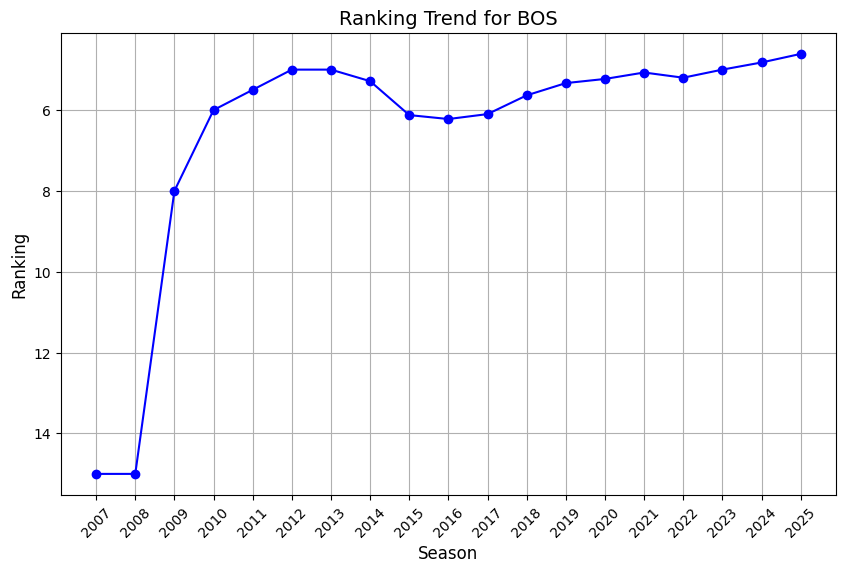

In [211]:
plot_team_ranking_trend('BOS', test_final_df)


In [214]:
test_final_df.to_csv('../../data/2007_2025_avg_odds_salary_players_champ_rk_po_avg_rk_cleaned.csv', index=False)

### Other

In [ ]:
# url = f"https://www.basketball-reference.com/teams/NOH/2013.html"

# response = requests.get(url)

# # print(response)
# # print(url)

# if response.status_code == 200:
#     soup = BeautifulSoup(response.content, 'html.parser')
#     table = soup.find('table', {'id': 'roster'})

#     if table:
#         df = pd.read_html(io.StringIO(str(table)))[0]

#         df['Season'] = 2013
        
#         df = clean_roster(df,'NOH')

#         all_avg_roster = pd.concat([all_avg_roster, df], ignore_index=True)

#     else:
    
#         print(f"No table found for 2013")

# else:
#     print(f"Failed to retrieve data for 2013")

In [ ]:
# url = f"https://www.basketball-reference.com/teams/NOH/2013.html"

# driver = webdriver.Chrome() 

# driver.get(url)

# time.sleep(5)

# soup = BeautifulSoup(driver.page_source, 'html.parser')

# div = soup.find('div', {'id': 'div_salaries2'})

# if div:
#     table = div.find('table', {'id': 'salaries2'})
#     if table:
#         df = pd.read_html(io.StringIO(str(table)))[0]
#         df['Season'] = 2013
#         df['team']= 'NOH'
#         df = clean_salaries(df)

#         all_salaries = pd.concat([all_salaries, df], ignore_index=True)

#     else:
#         print(f"No table found inside the div for NOH in 2013")
# else:
#     print(f"No div with id 'div_salaries2' found for NOH in 2013")

# driver.quit()